# Imports

In [1]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import signal
from scipy import interpolate

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# API setup

In [2]:
api = wandb.Api()

# ProtoCLR-C df fetch

In [3]:
volcanic_field_114 = api.run("p0int/ProtoCLR-C/3rhxialw")

# save the metrics for the run to a csv file
vf_114_df = volcanic_field_114.history()

In [4]:
vf_114_df[['trainer/global_step', 'train_accuracy_step']].dropna()

,trainer/global_step,train_accuracy_step
0,99,0.353333
1,199,0.373333
4,399,0.426667
5,449,0.466667
6,499,0.458333
...,...,...
315,29449,0.910000
316,29599,0.850000
317,29699,0.898333
319,29849,0.898333


In [5]:
vf_114_df['run_name'] = 'volcanic_field_114'

In [6]:
sns.set_theme()

In [7]:
def process_old_run(df):
    df.rename(columns={'train_accuracy': 'train_accuracy_step',
                       'loss': 'loss_step'
                      }, inplace=True)
    return df

In [8]:
# run is specified by <entity>/<project>/<run id>
snowy_wave = api.run("p0int/ProtoCLR-C/2b978x6l")

# save the metrics for the run to a csv file
snwy = snowy_wave.history()

In [9]:
giddy_bush_741 = api.run("p0int/ProtoCLR+AE/2a9qjo5x")

# save the metrics for the run to a csv file
gb_741_df = process_old_run(giddy_bush_741.history())

In [10]:
gb_741_df['run_name'] = 'giddy_bush_741'

In [11]:
df1 = vf_114_df[['trainer/global_step', 'train_accuracy_step']].dropna()

In [12]:
df2 = gb_741_df[['trainer/global_step', 'train_accuracy_step']].dropna()

In [13]:
stoic_valley_750 = api.run("p0int/ProtoCLR+AE/116eu3ga")

# save the metrics for the run to a csv file
stv_750 = process_old_run(stoic_valley_750.history())

In [14]:
df3 = stv_750[['trainer/global_step', 'train_accuracy_step']].dropna()

In [15]:
api = wandb.Api()
fine_dew_751 = api.run("/p0int/ProtoCLR+AE/runs/2b3txrka")
fd_751 = process_old_run(fine_dew_751.history())

In [66]:
def lineplt(df1, df2, col='train_accuracy_step', alpha=.5, lim=100):
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.style.use('ggplot')
    sns.set_context('paper')

    l = sns.lineplot(x=df1['trainer/global_step'][:lim],
                     y=df1[col][:lim].ewm(span=alpha).mean(),
                     linewidth=1.5,
                     label=r"ProtoCLR-C $\bf{(Ours)}$"
                    )
    sns.lineplot(x=df2['trainer/global_step'],
                 y=df2[col].ewm(span=alpha).mean(),
                 linewidth=1.5,
                 linestyle='--',
                 label='ProtoCLR')
    l.set_xlabel("Step")
    l.set_ylabel(col.replace("_"," ").capitalize())
    return l

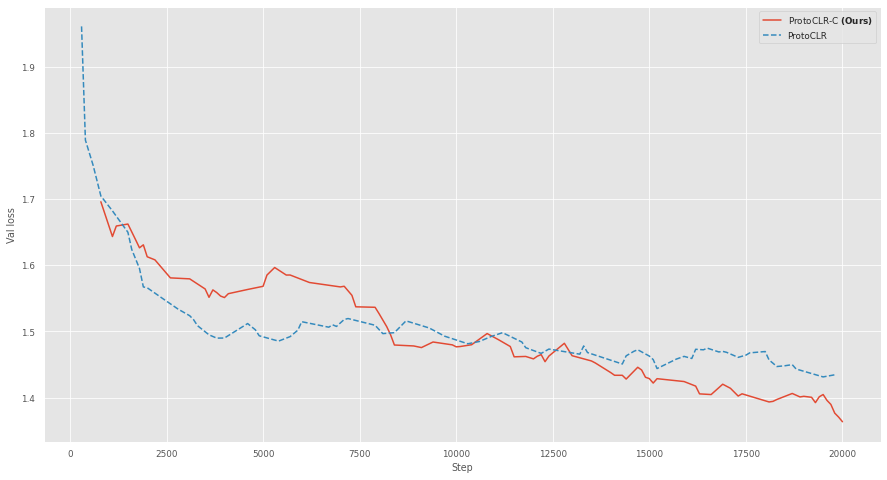

In [57]:
c = 'val_loss'
p = lineplt(snwy[['trainer/global_step', c]].dropna(),
        fd_751[['trainer/global_step', c]].dropna(),
        col=c, alpha=25, lim=120)

In [26]:
cerulean_b = api.run("p0int/ProtoCLR+AE/3hd8mxps")

# save the metrics for the run to a csv file
cb = process_old_run(cerulean_b.history())

<AxesSubplot:xlabel='Step', ylabel='Loss step'>

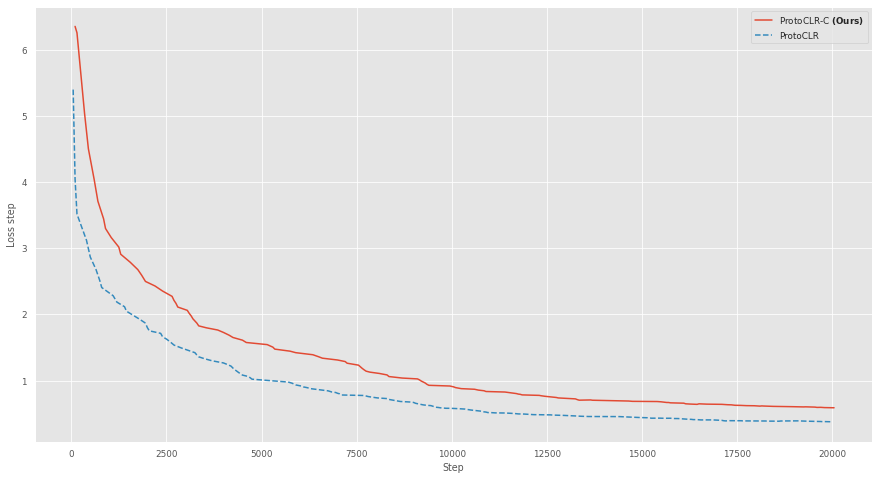

In [107]:
c = 'loss_step'
lineplt(snwy[['trainer/global_step', c]].dropna(),
        cb[['trainer/global_step', c]].dropna(),
        col=c, alpha=55, lim=200)

In [32]:
# run is specified by <entity>/<project>/<run id>
wandering_totem = api.run("p0int/ProtoCLR-C/3q8lz9zs")

# save the metrics for the run to a csv file
wt = process_old_run(wandering_totem.history())

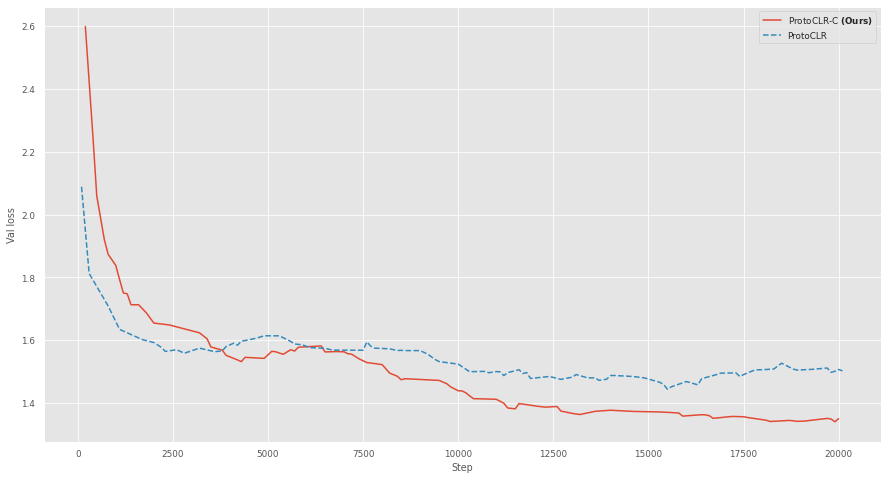

In [61]:
c = 'val_loss'
vloss = lineplt(wt[['trainer/global_step', c]].dropna(),
        gb_741_df[['trainer/global_step', c]].dropna(),
        col=c, alpha=25, lim=200)

In [65]:
vloss.get_figure().savefig("./assets/val_loss.png")

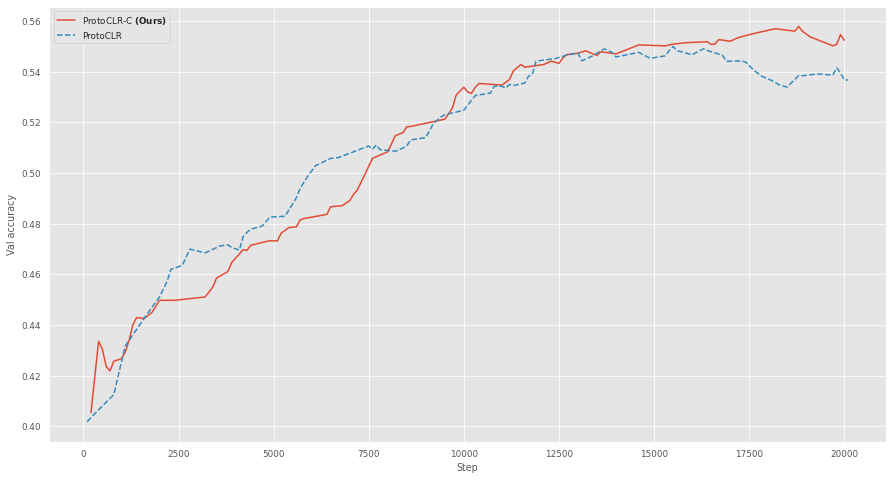

In [55]:
c = 'val_accuracy'
lineplt(wt[['trainer/global_step', c]].dropna(),
        gb_741_df[['trainer/global_step', c]].dropna(),
        col=c, alpha=25)

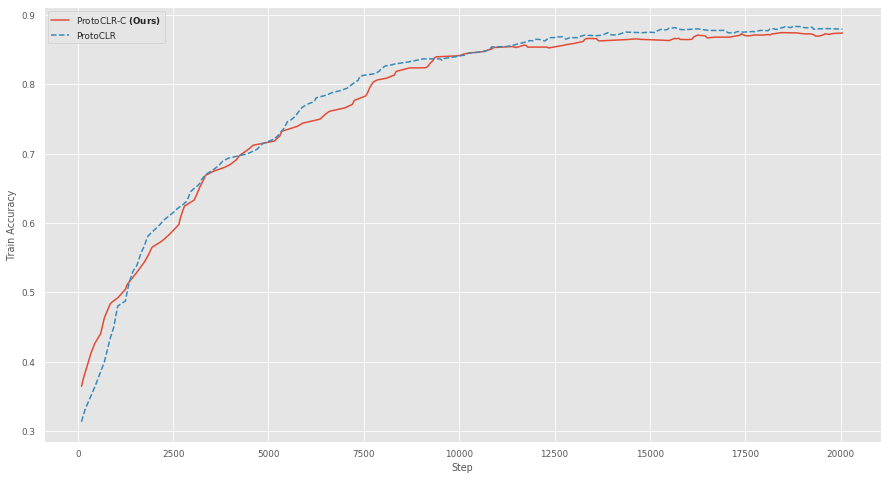

In [48]:
c = 'train_accuracy_step'
lineplt(snwy[['trainer/global_step', c]].dropna(),
        gb_741_df[['trainer/global_step', c]].dropna(),
        col=c, alpha=25, lim=200)

# Plot Grid

In [82]:
def ewm_splitter(df, c, span):
    tmp = df[['trainer/global_step', c]].dropna().ewm(span=25).mean()
    return {'x': tmp.iloc[:, 0], 'y': tmp.iloc[:, 1]}

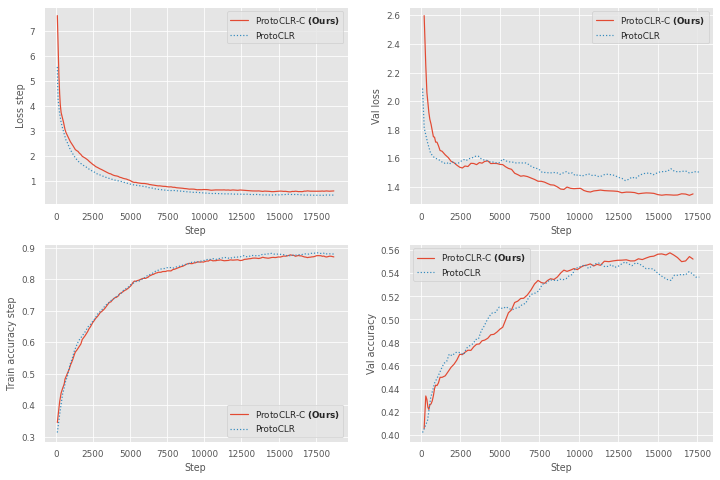

In [115]:
fig, axs_ = plt.subplots(2, 2, figsize=(12, 8))
axs = axs_.flatten()
metrics = ['loss_step', 'val_loss', 'train_accuracy_step', 'val_accuracy']
# train loss

for ax, metric in zip(axs, metrics):
    ax.set_xlabel("Step")
    ax.set_ylabel(metric.replace("_", " ").capitalize())
    
    sns.lineplot(**ewm_splitter(wt, metric, 25), ax=ax, label=r"ProtoCLR-C $\bf{(Ours)}$")
    sns.lineplot(**ewm_splitter(gb_741_df, metric, 25), ax=ax, label="ProtoCLR", linestyle='dotted')

In [117]:
fig.savefig('./assets/4_metric_plot.png')